# Generative Models

## Visualizing Dataset

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv', sep=',')

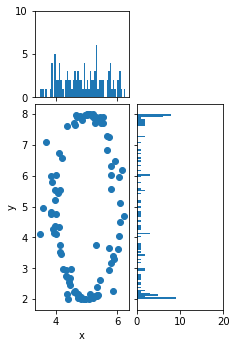

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

x = [T[0] for T in data.values]
y = [T[1] for T in data.values]

fig, axScatter = plt.subplots(figsize=(5.5, 5.5))

plt.xlabel('x')
plt.ylabel('y')

axScatter.scatter(x, y)
axScatter.set_aspect(1.)

divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(), visible=False)

binwidth = 0.05
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(0, lim + binwidth, binwidth)
axHistx.hist(x, bins=np.arange(np.min(x) - binwidth, np.max(x) + binwidth, binwidth))
axHisty.hist(y, bins=np.arange(np.min(y) - binwidth, np.max(y) + binwidth, binwidth), orientation='horizontal')

for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 5, 10])

for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 10, 20])

plt.draw()
plt.show()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


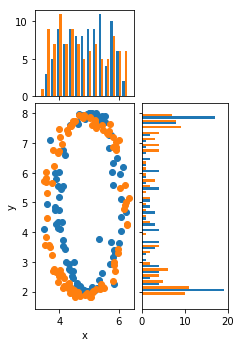

In [5]:
sample_size = 100

mux, muy = np.mean(data.values, axis=0)

a = (np.max(x) - np.min(x)) / 2
b = (np.max(y) - np.min(y)) / 2

up = np.random.normal(np.pi / 2, np.pi * .25, sample_size / 2)
down = np.random.normal(-np.pi / 2, np.pi * .25, sample_size / 2)

selection = np.concatenate((down, up), axis=0)
ellipse_x = a * np.cos(selection) + mux + np.random.normal(0, .1, sample_size)
ellipse_y = b * np.sin(selection) + muy + np.random.normal(0, .1, sample_size)

fig, axScatter = plt.subplots(figsize=(5.5, 5.5))

plt.xlabel('x')
plt.ylabel('y')

axScatter.scatter(x, y)
axScatter.scatter(ellipse_x, ellipse_y)
axScatter.set_aspect(1.)

divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(), visible=False)

binwidth = 0.20
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(0, lim + binwidth, binwidth)
axHistx.hist([x, ellipse_x], bins=np.arange(np.min(x) - binwidth, np.max(x) + binwidth, binwidth))
axHisty.hist([y, ellipse_y], bins=np.arange(np.min(y) - binwidth, np.max(y) + binwidth, binwidth), orientation='horizontal')

for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 5, 10])

for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 10, 20])

plt.draw()
plt.show()